In [2]:
import numpy as np
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [4]:
oto = pd.read_csv("autoproject.csv")

In [8]:
oto

price     km   hp  Previous Owners  Warranty  Nr. of Doors  Nr. of Seats  Displacement  Cylinders  Consumption  CO2 Emission  Gears  cc_Air conditioning  cc_Air suspension  cc_Armrest  cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  cc_Electrically adjustable seats  cc_Electrically heated windshield  cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  cc_Light sensor  cc_Lumbar support  cc_Massage seats  cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  cc_Park Distance Control  cc_Parking assist system camera  cc_Parking assist system self-steering  cc_Parking assist system sensors front  cc_Parking assist system sensors rear  cc_Power windows  cc_Rain sensor  cc_Seat heating  cc_Seat ventilation  cc_Split rear seats  cc_Start-stop system  cc_Sunroof  cc_Tinted windows  cc_Wind deflector  cc_Windshield  em_Bluetooth  em_CD player  em_Digital radio  em_Hands-free equipment  em_MP3  em_On-board computer  em_Radio  em_Sound system  em_Television  em_USB  ex_Alloy wheels  ex_Cab or rented Car  ex_Catalytic Converter  ex_Handicapped enabled  ex_Right hand drive  ex_Roof rack  ex_Shift paddles  ex_Ski bag  ex_Sliding door  ex_Sport package  ex_Sport seats  ex_Sport suspension  ex_Touch screen  ex_Trailer hitch  ex_Tuned car  ex_Voice Control  ex_Winter tyres  ss_ABS  ss_Adaptive Cruise Control  ss_Adaptive headlights  ss_Alarm system  ss_Blind spot monitor  ss_Central door lock  ss_Central door lock with remote control  ss_Daytime running lights  ss_Driver drowsiness detection  ss_Driver-side airbag  ss_Electronic stability control  ss_Emergency brake assistant  ss_Emergency system  ss_Fog lights  ss_Head airbag  ss_Immobilizer  ss_Isofix  ss_LED Daytime Running Lights  ss_LED Headlights  ss_Lane departure warning system  ss_Night view assist  \
0      15770  56013   66                2        12             5             5          1422          3         3.80            99      5                    1                  0           1                             1                     0                  1                    0                     0                           1                                 0                                  0                    0                         0               1                             0                 0                          1                1                  0                 0                                 1                     1                 0                         1                                0                                       0                                       0                                      1                 1               1                1                    0                    0                     1           0                  0                  0              0             1             0                 0                        1       0                     1         1                0              0       0                1                     0                       1                       0                    0             0                 0           0                0                 0               0                    0                0                 0             0                 1                0       1                           0                       0                0                      0                     1                                         0                          1                               0                      1                                1                             0                    0              1               0               1          1                              0                  0                                 0                     0   
1      14500  80000  141                1  

In [21]:
numeric_col = "price, km, hp, Previous Owners, Consumption, CO2 Emission, Gears".split(",")

In [22]:
numeric_col

['price',
 ' km',
 ' hp',
 ' Previous Owners',
 ' Consumption',
 ' CO2 Emission',
 ' Gears']

In [30]:
oto_corr = oto[['price', 'km', 'hp', 'Previous Owners','Consumption','CO2 Emission', 'Gears']]

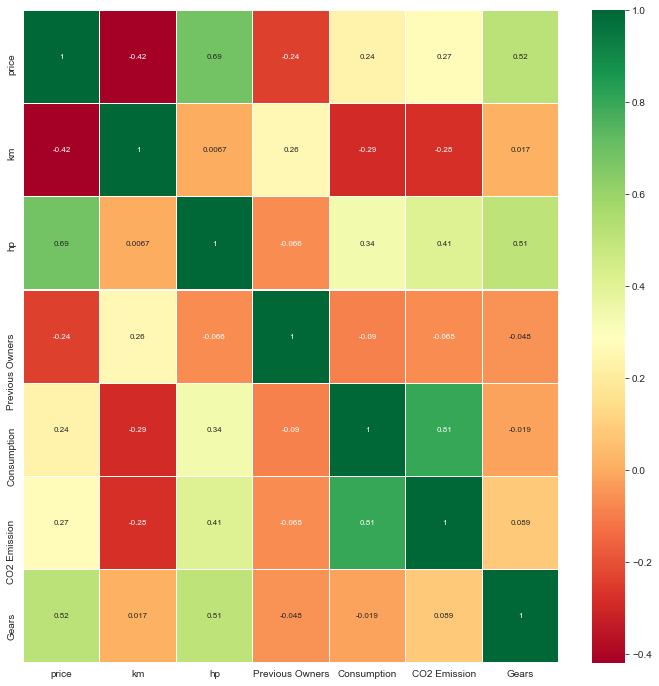

In [31]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

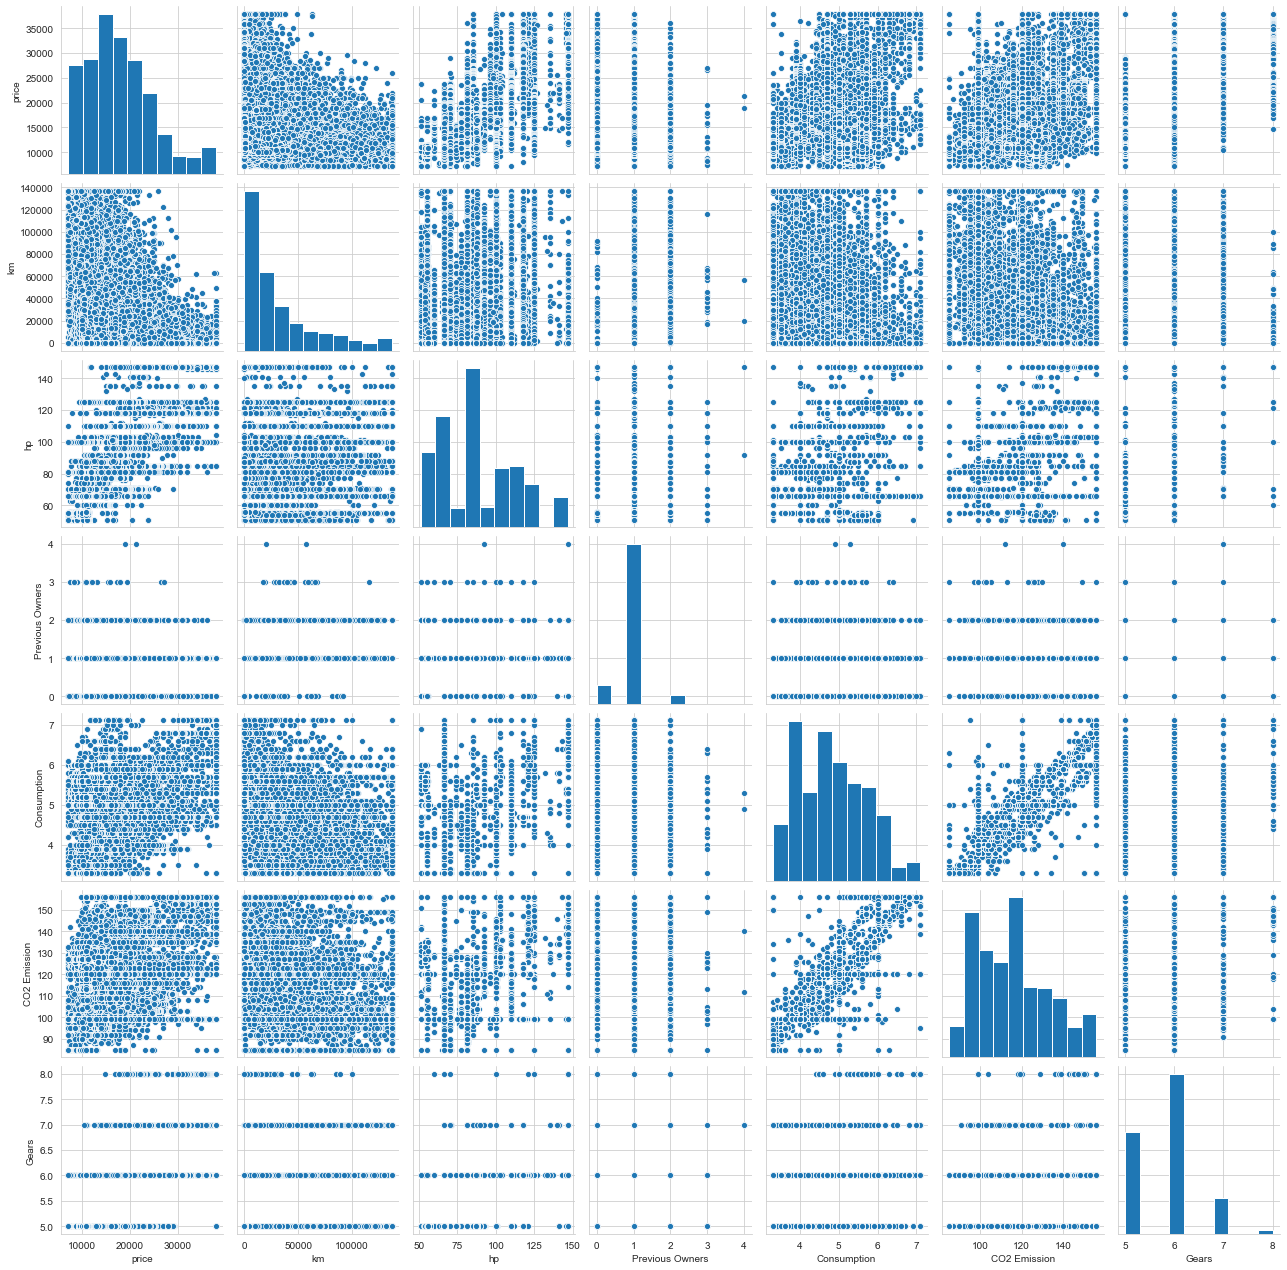

In [32]:
sns.pairplot(oto[['price', 'km', 'hp', 'Previous Owners','Consumption','CO2 Emission', 'Gears']])

In [33]:
oto.price.describe()

count   15919.00
mean    17915.87
std      6961.48
min      7180.00
25%     12850.00
50%     16900.00
75%     21900.00
max     37870.00
Name: price, dtype: float64

In [34]:
oto["CO2 Emission"].describe()

count   15919.00
mean      116.32
std        16.71
min        85.00
25%       102.00
50%       116.00
75%       127.00
max       156.00
Name: CO2 Emission, dtype: float64

In [35]:
oto["CO2 Emission"].plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'